In [1]:
import pandas as pd

In [11]:
pip install --upgrade openpyxl

In [3]:
import pandas as pd

survey = pd.read_excel("Sample Survey.xlsx",sheet_name="Data")

print(survey.head())

   response_id collection_date urban_rural  education               income  \
0            1      2020-08-24       Rural  12th Pass  ₹ 30,000 - ₹ 50,000   
1            2      2020-08-24       Rural   Graduate  ₹ 20,000 - ₹ 30,000   
2            3      2020-08-24       Rural   Graduate   ₹ 5,000 - ₹ 10,000   
3            4      2020-08-24       Urban   Graduate  ₹ 10,000 - ₹ 20,000   
4            5      2020-08-24       Rural   Graduate  ₹ 50,000 - ₹ 80,000   

  Vote_Now     Past_Vote     CM_satisfaction    MLA_satisfaction age gender  \
0      BJP           BJP  Fully Dissatisfied  Fully Dissatisfied  26   Male   
1     RLSP         JD(U)  Somewhat Satisfied  Fully Dissatisfied  34   Male   
2   JAP(L)           BJP  Fully Dissatisfied  Somewhat Satisfied  25   Male   
3      RJD           RJD  Fully Dissatisfied  Somewhat Satisfied  36   Male   
4    JD(U)  Did not vote     Fully Satisfied     Fully Satisfied  22   Male   

   assembly_no category    weight  
0          211      

In [18]:
samples_per_day = survey["collection_date"].value_counts()
print(samples_per_day)

collection_date
2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: count, dtype: int64


In [19]:
survey["age"] = pd.to_numeric(survey["age"], errors="coerce")
total = len(survey)
less_than_45 = len(survey[survey["age"] < 45])
p_less_than_45 = less_than_45 / total
print(f"Proportion of respondents aged less than 45: {less_than_45:.2%}")

Proportion of respondents aged less than 45: 93.17%


In [20]:
age_bins = [18, 25, 40, 55, float("inf")]
age_labels = ["18-25", "25-40", "40-55", "55+"]
survey["age_group"] = pd.cut(survey["age"], bins=age_bins, labels=age_labels)

survey["age"] = survey["age"].dropna()

survey["age"] = survey["age"].astype(int)

print(survey[["response_id", "age", "age_group"]].head())

   response_id  age age_group
0            1   26     25-40
1            2   34     25-40
2            3   25     18-25
3            4   36     25-40
4            5   22     18-25


In [21]:
age_group = survey["age_group"].value_counts()
print(age_group)

age_group
25-40    3423
18-25    2566
40-55     644
55+       108
Name: count, dtype: int64


In [22]:
votes = survey[(survey["Vote_Now"] == "RJD") & (survey["Past_Vote"] == "RJD")]
votes1 = len(votes) / len(survey)
print(f"Proportion of respondents choosing RJD in both Vote_Now and Past_Vote: {votes1:.2%}")

Proportion of respondents choosing RJD in both Vote_Now and Past_Vote: 11.81%


In [31]:
satisfied = survey[survey["CM_satisfaction"] == "Fully Satisfied"].groupby("collection_date").size() / samples_per_day
print("Proportion of fully satisfied respondents with CM performance per day:")
print(satisfied)

Proportion of fully satisfied respondents with CM performance per day:
collection_date
2020-08-24    0.098715
2020-08-25    0.095190
2020-08-26    0.098662
2020-08-27    0.081203
2020-08-28    0.120894
2020-08-29    0.117742
2020-08-30    0.111684
2020-08-31    0.111311
2020-09-01    0.123558
Freq: D, dtype: float64


In [27]:
survey[survey["CM_satisfaction"] == "Fully Satisfied"].groupby("collection_date").size()

collection_date
2020-08-24    146
2020-08-25     95
2020-08-26     59
2020-08-27     54
2020-08-28     92
2020-08-29     73
2020-08-30     65
2020-08-31     62
2020-09-01     75
dtype: int64

<AxesSubplot:title={'center':'Proportion of fully dissatisfied respondents with MLA performance'}, xlabel='collection_date'>

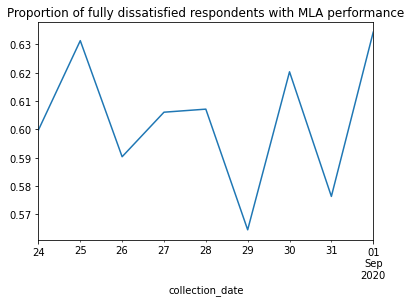

In [32]:
dissatisfied = survey[survey["MLA_satisfaction"] == "Fully Dissatisfied"].groupby("collection_date").size() / samples_per_day
dissatisfied.plot(kind="line", title="Proportion of fully dissatisfied respondents with MLA performance")

In [33]:
count = pd.crosstab(survey["Past_Vote"], survey["Vote_Now"])
print(count)

Vote_Now      AAP  AIMIM   BJP  BSP  HAM  INC  JAP(L)  JD(U)  LJP  Left Front  \
Past_Vote                                                                       
BJP             7      1  1630    3    5   42     101    110   44          13   
BSP             0      1     2    5    0    1       0      0    0           0   
Did not vote    8      5   231    2    1   22      41     69   10          16   
HAM             2      0    25    0    1    0       3      2    2           0   
INC             0      6     6    0    0   57      10      9    0           3   
JAP(L)          0      0     4    0    0    0      35      0    0           0   
JD(U)           6     10   254    2    2   45      72    279   29           9   
LJP             0      0    76    1    0    4       3      6    9           2   
Left Front      0      1     2    0    0    1       0      0    0          18   
NOTA            0      1    29    1    0    9       7      7    3           5   
Others          1      5    

In [34]:
table_weight_sum = pd.crosstab(survey["Past_Vote"], survey["Vote_Now"], values=survey["weight"], aggfunc="sum")
print(table_weight_sum)

Vote_Now            AAP      AIMIM          BJP        BSP        HAM  \
Past_Vote                                                               
BJP            4.807335   0.349996  1049.344112   0.452551  10.171283   
BSP                 NaN   1.654731     5.174487  32.010277        NaN   
Did not vote   8.865896   5.379527   114.203906   3.329611   2.497170   
HAM            0.312607        NaN    25.348884        NaN   1.648856   
INC                 NaN  11.105958     1.642875        NaN        NaN   
JAP(L)              NaN        NaN     6.512846        NaN        NaN   
JD(U)         12.457216  29.198610   156.243100  11.005903   2.639574   
LJP                 NaN        NaN    85.010450   2.481377        NaN   
Left Front          NaN   2.298223     0.209586        NaN        NaN   
NOTA                NaN   1.061204    12.685435   0.051485        NaN   
Others        13.661335  21.212705    34.866218   0.684568   1.505864   
RJD            5.515847  24.149369    32.285093    

In [42]:
by_agegroup = survey.groupby("age_group").size()
print(by_agegroup)

age_group
18-25    2566
25-40    3423
40-55     644
55+       108
dtype: int64


C:\Users\Ridam Gupta\AppData\Local\Temp\ipykernel_18288\2290124993.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_agegroup = survey.groupby("age_group").size()


In [37]:
jdu_samples = survey[survey["Vote_Now"] == "JD(U)"]
jdu_samples_age = jdu_samples.groupby("age_group").size()

jdu_samples_df = pd.DataFrame(jdu_samples_age, columns=["JDU_samples"])

print(jdu_samples_df)


           JDU_samples
age_group             
18-25              198
25-40              245
40-55               55
55+                 10


C:\Users\Ridam Gupta\AppData\Local\Temp\ipykernel_18288\3154768664.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jdu_samples_age = jdu_samples.groupby("age_group").size()
